In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


In [2]:
import numpy as np
import pandas as pd
import time

# For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap


In [3]:
train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.shape

(27455, 785)

In [5]:
## Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

In [6]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


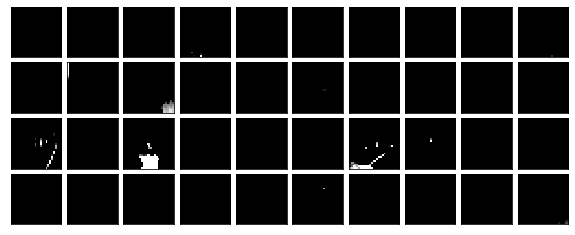

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [8]:
## Importing and Apply PCA

start = time.time()
pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principal_df.shape
print('Duration: {} seconds'.format(time.time() - start))


Duration: 0.9518454074859619 seconds


Text(0, 0.5, 'Principal Component 2')

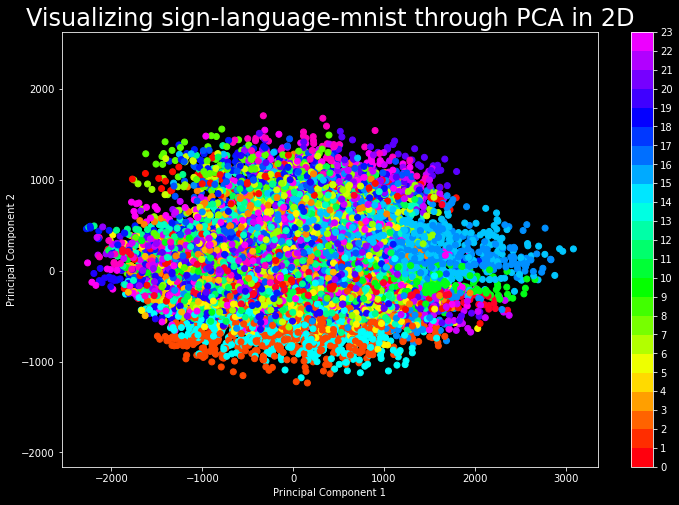

In [22]:
# Plot the first two principal components of each point to learn about the data:
fig = plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
plt.title('Visualizing sign-language-mnist through PCA in 2D', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

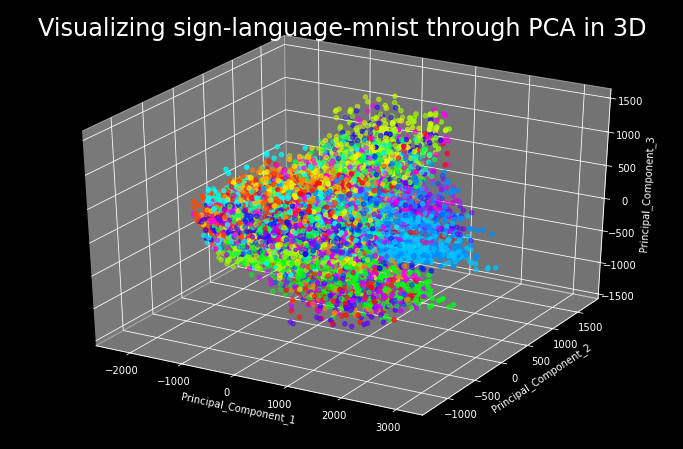

In [23]:
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=principalComponents[:, 0], 
    ys=principalComponents[:, 1], 
    zs=principalComponents[:, 2], 
    c=y, 
    cmap='gist_rainbow'
)
ax.set_xlabel('Principal_Component_1')
ax.set_ylabel('Principal_Component_2')
ax.set_zlabel('Principal_Component_3')
plt.title('Visualizing sign-language-mnist through PCA in 3D', fontsize=24);
plt.show()

In [11]:
# t-SNE does consume a lot of memory so let's consider only a subset of the dataset. 

start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))


Duration: 461.43256425857544 seconds


Text(0, 0.5, 'tsne_2')

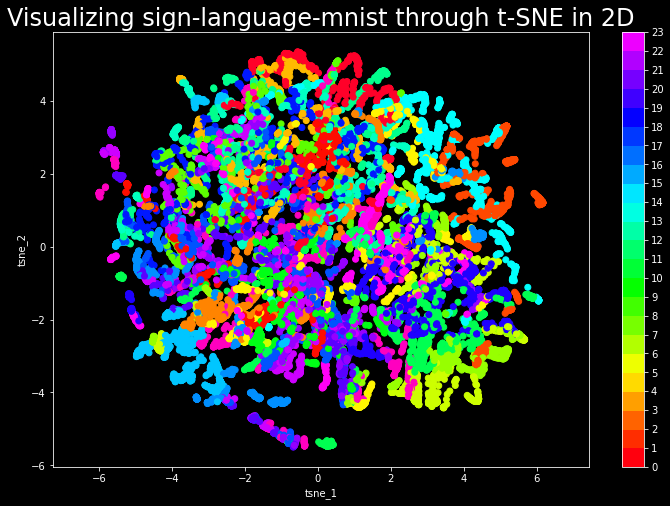

In [24]:
#Visualising t-SNE 
fig = plt.figure(figsize=(12,8))
plt.scatter(tsne[:, 0], tsne[:, 1], c=y, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
plt.title('Visualizing sign-language-mnist through t-SNE in 2D', fontsize=24);
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

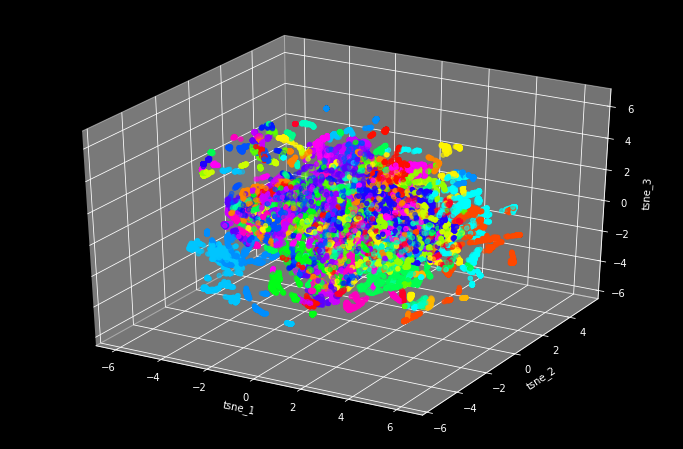

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne[:, 0], tsne[:, 1],tsne[:,2], c=y, cmap='gist_rainbow')
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')
plt.title('Visualizing sign-language-mnist through TSNE in 3D', fontsize=24);
plt.show()


In [15]:

start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))


/opt/conda/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/conda/lib/python3.7/site-packages/umap/utils.py", line 451:
@numba.njit(parallel=True)
def build_candidates(
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 24 separate connected components using meta-embedding (experimental)
  n_components
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Duration: 109.59749555587769 seconds


In [ ]:
reducer

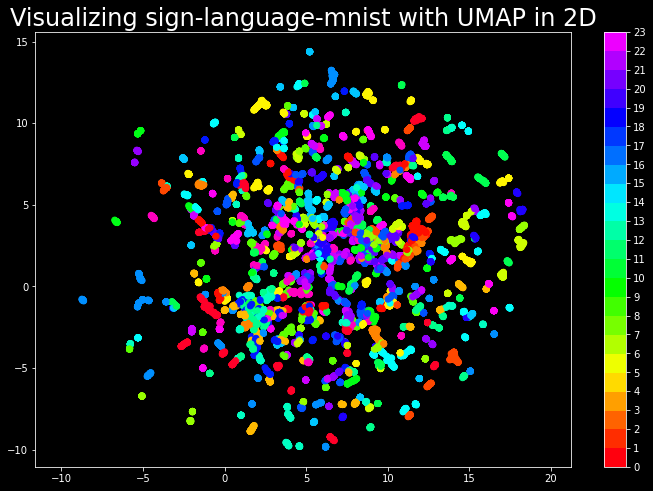

In [27]:
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=y, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
plt.title('Visualizing sign-language-mnist with UMAP in 2D', fontsize=24);


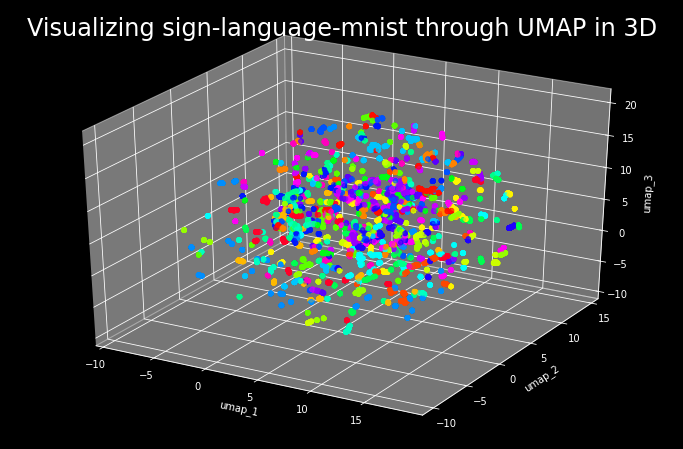

In [28]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],reducer.embedding_[:, 2], c=y, cmap='gist_rainbow')
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
ax.set_zlabel('umap_3')
plt.title('Visualizing sign-language-mnist through UMAP in 3D', fontsize=24);
plt.show()